In [1]:
version()

'SageMath version 9.3, Release Date: 2021-05-09'

In [2]:
%display latex

In [3]:
Parallelism().set(nproc=8)

In [4]:
a, m=var('a m')
a0=0
m=1

In [5]:
from kerrgeodesic_gw import KerrBH
M=KerrBH(a, m)
print(M)

Kerr spacetime M


In [6]:
rH=M.event_horizon_radius()
rH

sqrt(-a^2 + 1) + 1

In [7]:
rH0=rH.subs({a:a0})
rH0

2

In [8]:
BL.<t,r,th,ph>=M.boyer_lindquist_coordinates()
BL

Chart (M, (t, r, th, ph))

In [9]:
g=M.metric()
g.display()

g = -(a^2*cos(th)^2 + r^2 - 2*r)/(a^2*cos(th)^2 + r^2) dt*dt - 2*a*r*sin(th)^2/(a^2*cos(th)^2 + r^2) dt*dph + (a^2*cos(th)^2 + r^2)/(a^2 + r^2 - 2*r) dr*dr + (a^2*cos(th)^2 + r^2) dth*dth - 2*a*r*sin(th)^2/(a^2*cos(th)^2 + r^2) dph*dt + (2*a^2*r*sin(th)^4 + (a^2*r^2 + r^4 + (a^4 + a^2*r^2)*cos(th)^2)*sin(th)^2)/(a^2*cos(th)^2 + r^2) dph*dph

In [10]:
g[:]

[                                               -(a^2*cos(th)^2 + r^2 - 2*r)/(a^2*cos(th)^2 + r^2)                                                                                                 0                                                                                                 0                                                            -2*a*r*sin(th)^2/(a^2*cos(th)^2 + r^2)]
[                                                                                                0                                                           (a^2*cos(th)^2 + r^2)/(a^2 + r^2 - 2*r)                                                                                                 0                                                                                                 0]
[                                                                                                0                                                                                                 0                                                                               a^2*cos(th)^2 + r^2                                                                                                 0]
[                                                           -2*a*r*sin(th)^2/(a^2*cos(th)^2 + r^2)                                                                                                 0                                                                                                 0 (2*a^2*r*sin(th)^4 + (a^2*r^2 + r^4 + (a^4 + a^2*r^2)*cos(th)^2)*sin(th)^2)/(a^2*cos(th)^2 + r^2)]

## Geodésica tipo tiempo acotada

Establecemos $\mu=1$ y escogemos algunos valores de $E$, $L$ y $Q$ con $E<1$ para asegurar que estamos lidiando con una geodésica acotada.

In [115]:
mu=0.9971
E=0.975
L=4
Q=0

In [116]:
l=L/mu
eps=E/mu
lcrit=2*sqrt(3)*m
r1=l/(2*m)*(l-sqrt(l^2-lcrit^2))
r2=l/(2*m)*(l+sqrt(l^2-lcrit^2))
r1, r2

(3.98849986000374, 12.1047053865703)

In [117]:
Vl(r)=(-m/r+l^2/2/r^2*(1-2*m/r))
Vl(r)

-1/r - 8.04660262328700*(2/r - 1)/r^2

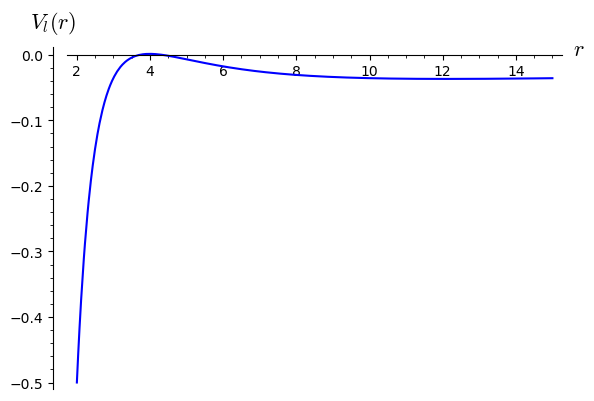

In [119]:
graph = plot(Vl(r), (r, 2, 15), thickness=1.5,
             axes_labels=[r'$r$', r'$V_l(r)$'])
graph

In [128]:
r=var('r')
R(r)=((E^2-mu^2)*r^4
      +2*m*mu*r^3
      +(a0^2*(E^2-mu^2)-Q-L^2)*r^2
      +2*m*(Q+(L-a0*E)^2)*r
      -a0^2*Q)
R(r)

-0.0435834100000000*r^4 + 1.99420000000000*r^3 - 16.0000000000000*r^2 + 32.0000000000000*r

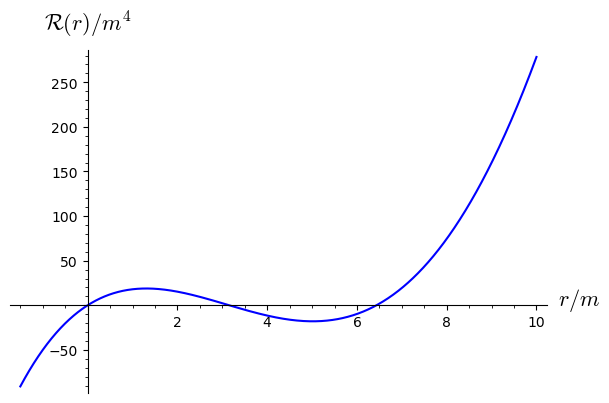

In [129]:
graph = plot(R(r), (r, -1.5, 10), thickness=1.5,
             axes_labels=[r'$r/m$', r'$\mathcal{R}(r)/m^4$'])
graph

Punto inicial $P$ de la geodésica

In [120]:
P = M.point((0, 8, pi/2, 0), name='P')
print(P)

Point P on the Kerr spacetime M


In [123]:
lmax=3000
Li=M.geodesic([0,lmax],P,mu=mu,E=E,L=L,Q=Q,a_num=a0,
             name='Li', latex_name=r'\mathcal{L}', verbose=True)

Initial tangent vector: 


p = 1.30000000000000 d/dt + 0.132169181354807 d/dr + 1/16 d/dph

The curve was correctly set.
Parameters appearing in the differential system defining the curve are [a].


In [124]:
Li.integrate(step=0.005)
Li.plot(plot_points=2000, thickness=1.5, viewer='tachyon')

Graphics3d Object

In [125]:
P2 = M.point((0, 10, pi/2, 0), name='P')
print(P)

Point P on the Kerr spacetime M


In [126]:
lmax=1000
Li2=M.geodesic([0,lmax],P2,mu=mu,E=E,L=L,Q=Q,a_num=a0,
             name='Li2', latex_name=r'\mathcal{L}_2', verbose=True)

Initial tangent vector: 


p = 1.21875000000000 d/dt + 0.165100793456603 d/dr + 1/25 d/dph

The curve was correctly set.
Parameters appearing in the differential system defining the curve are [a].


In [127]:
Li2.integrate(step=0.005)
Li2.plot(plot_points=2000, thickness=1.5, viewer='tachyon')

Graphics3d Object

In [ ]:
#integrate?

In [19]:
#kerrgeodesic_gw?